In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('C:\\Users\\saipr\\Downloads\\User_Data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.shape

(400, 5)

# Exploratory Data Analysis

In [7]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [8]:
df['Gender'].unique()

array([1, 0])

In [9]:
df['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54], dtype=int64)

In [10]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [11]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


# Data Visualization

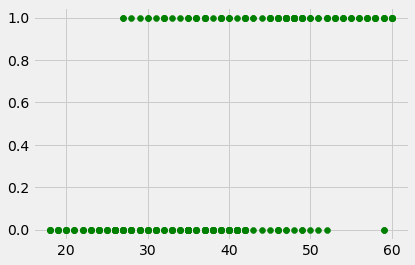

In [12]:
plt.style.use('fivethirtyeight')
x=df['Age']
y=df['Purchased']
plt.scatter(x,y,marker='o',color='g')

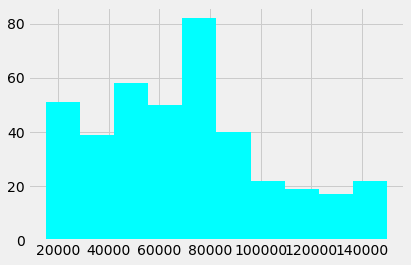

In [13]:
plt.hist(x=df['EstimatedSalary'],bins=10,color='cyan')
plt.show()

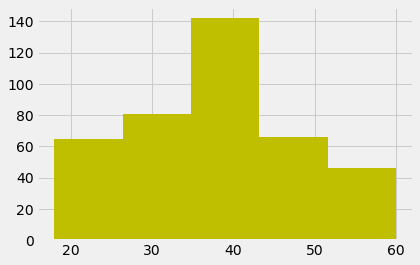

In [14]:
plt.hist(x=df['Age'],bins=5,color='y')
plt.show()

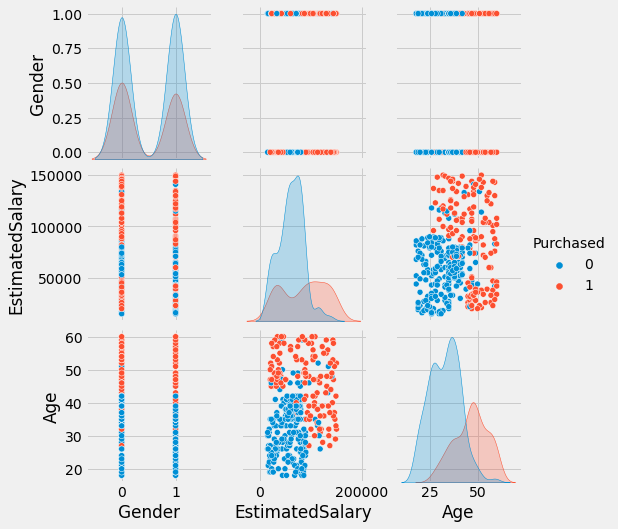

In [15]:
sns.pairplot(data = df, hue = "Purchased", vars = ["Gender", "EstimatedSalary", "Age"])

<AxesSubplot:xlabel='Age', ylabel='count'>

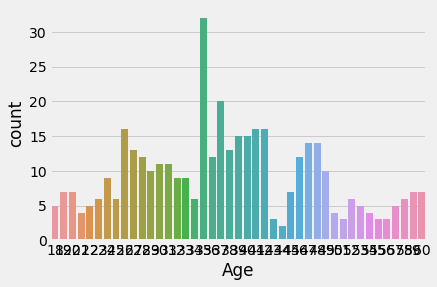

In [16]:
#plotting countplot with Age column
sns.countplot(x='Age', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

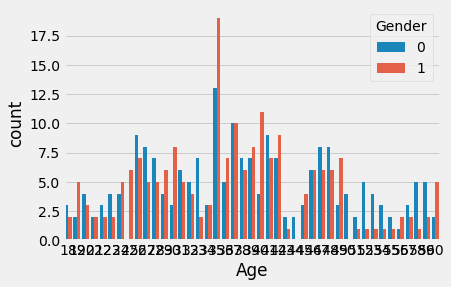

In [17]:
sns.countplot(x='Age',hue='Gender' ,data = df)

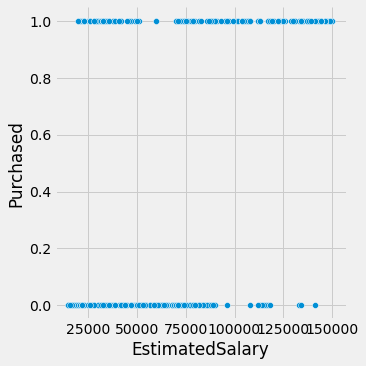

In [18]:
sns.relplot(x='EstimatedSalary',y='Purchased',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

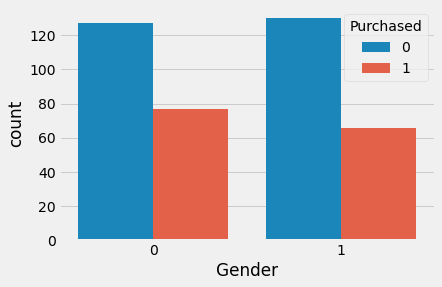

In [19]:
sns.countplot(x='Gender',hue='Purchased',data=df)


# Training and testing the data

In [20]:
X=df[['Gender','Age','EstimatedSalary']]
Y=df['Purchased']

# Splitting the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=50)

In [23]:
X_train.shape

(280, 3)

In [24]:
X_test.shape

(120, 3)

# Training the model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)

In [26]:
knc.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

# Prediction

In [27]:
Y_pred=knc.predict(X_test)

In [28]:
Y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

# Calculating score of model

In [29]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test,Y_pred)

In [30]:
ac

0.825

In [31]:
accuracy=ac*100
accuracy

82.5

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)

In [33]:
cm

array([[72,  8],
       [13, 27]], dtype=int64)

In [34]:
X_test

,Gender,Age,EstimatedSalary
146,0,27,96000
332,1,42,65000
67,0,23,82000
362,0,47,50000
102,0,32,86000
...,...,...,...
355,1,60,34000
244,0,41,72000
217,1,40,78000
168,1,29,148000


In [35]:
Y_test

146    1
332    0
67     0
362    1
102    0
      ..
355    1
244    0
217    0
168    1
74     0
Name: Purchased, Length: 120, dtype: int64

In [36]:
knc.predict([[0,27,96000]]) #it gave correct value

array([1], dtype=int64)

In [37]:
knc.predict([[1,32,18000]]) #correct prediction

array([0], dtype=int64)

# Visualization of accuracy score

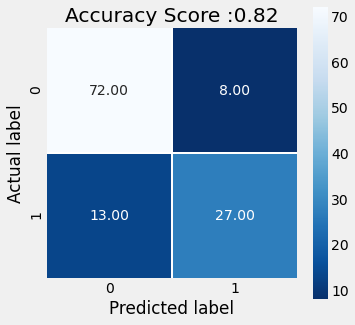

In [38]:
plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

A=f'Accuracy Score :{ac:.2f}'

plt.title(A)


plt.show()